# **Data visualisation**

## Objectives

* Visalise the data to determine the image shape and variability between sets.
* Create an image montage to tackle a buisness case.

## Inputs

* Healthy and powerdy_mildew infected cherry leave images, that have been seperated into train, test and validation folders.

## Outputs

* Output image shape for use in model optimisation and evaluation.
* Plot averages of all images in each class.
* Create variability plot showing variability between the healthy and powdery_mildew images.
* Create montage to visualise provide a visual representation of the images in different classes side-by-side to the client.



---

# Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import joblib
sns.set_style("white")


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/project-5'

---

# Set input directories

Section 2 content

In [5]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_dir = data_dir + '/train/'
val_dir = data_dir + '/validation/'
test_dir = data_dir + '/test/'

# Set output directory

In [6]:
version_num = 'v1'
output_dir = f'outputs/{version_num}'

if os.path.exists(output_dir):
    print('Output already exists - please pick a new version number if you want to create a new output directory')
else:
    os.makedirs(output_dir)
    print(f'Output {version_num} created')

Output already exists - please pick a new version number if you want to create a new output directory


# Set label names

In [7]:
labels = os.listdir(train_dir)
print('Image labels are: ', labels)

Image labels are:  ['powdery_mildew', 'healthy']


# Plot image shape

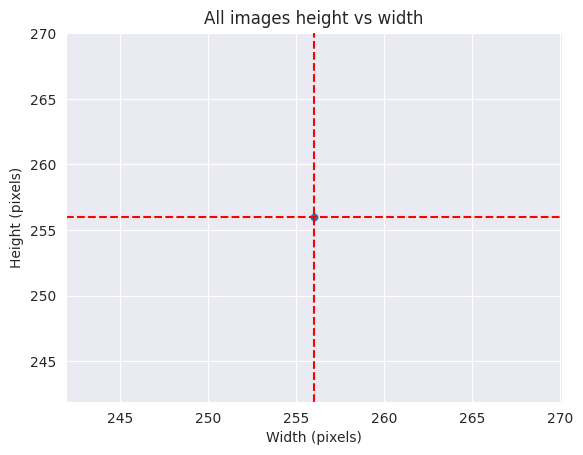

The average width of the images are 256 and the average height is 256


In [8]:
import matplotlib.image as mpimg

# set empty lists to store image height and width
img_width, img_height = [], []

# iterate through each class
for label in labels:
    files_folder = train_dir + '/' + label
    file_list = os.listdir(files_folder)
 
    # iterate through files
    for file in file_list:
        
        file_path = os.path.join(files_folder, file)
        image = mpimg.imread(file_path)
        width, height, color = image.shape
        img_width.append(width)
        img_height.append(height)

sns.set_style("darkgrid")
fig, axes = plt.subplots()
plt.title('All images height vs width')
sns.scatterplot(x=img_width, y=img_height, alpha=0.3)
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
width_mean = int(sum(img_width) / len(img_width))
height_mean = int(sum(img_height) / len(img_height))
axes.axvline(x=width_mean, color='r', linestyle='--')
axes.axhline(y=height_mean, color='r', linestyle='--')
plt.show()
print(f"The average width of the images are {width_mean} and the average height is {height_mean}")


In [9]:
image_shape = (width_mean, height_mean, 3)
image_shape

(256, 256, 3)

## Save image shape

In [10]:
joblib.dump(value=image_shape ,
            filename=f"outputs/{version_num}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

# Load images into an array

In [11]:
import numpy as np

def load_imgs_as_array(data_dir, new_size=(40,40), num_images_per_label=20):

    """
    Load images into a numpy array
    """
    
    X, y = np.array([], dtype='int'), np.array([], dtype='object')

    for label in labels:
        num_interations = 0
        
        # Defines the directory path where the images are located
        files_folder = train_dir + '/' + label
        file_list = os.listdir(files_folder)
        
        for file in file_list:   
            
            if num_interations < num_images_per_label:
                
                file_path = os.path.join(files_folder, file)
                
                img = mpimg.imread(file_path)
                
                if img.max() > 1:
                    img_resized = img / 255
                else:
                    img_resized = img
                
                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                num_interations += 1
    
    return X, y


In [12]:
X, y = load_imgs_as_array(data_dir=train_dir, new_size=image_shape, num_images_per_label=30)
print(X.shape, y.shape)

(60, 256, 256, 3) (60,)


## Plot amean variability of images per label

In [17]:
def plot_mean_variability_per_label(X, y, figsize=(12,5), save_image=False):

    """
    Calculates and plots the mean and standard deviation of the images
    Saves the image if save_image = True
    """
    
    for presented_label in np.unique(y):
        sns.set_style('white')
        
        y = y.reshape(-1,1,1)
        
        mask = np.any(y==presented_label,axis=1).reshape(-1)
        array = X[mask]
        
        average_img = np.mean(array, axis = 0)
        stdev_img = np.std(array, axis = 0)
        
        print(f"=== Label {presented_label} ===")
        print(f"Image shape: {average_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        
        axes[0].set_title(f"Average image for label {presented_label}")
        axes[0].imshow(average_img, cmap='gray')
        axes[1].set_title(f"Variability image for label {presented_label}")
        axes[1].imshow(stdev_img, cmap='gray')
        
        if save_image:
            plt.savefig(f"{output_dir}//avg_var_{presented_label}.png", bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print('\n')

=== Label healthy ===
Image shape: (256, 256, 3)
=== Label powdery_mildew ===
Image shape: (256, 256, 3)


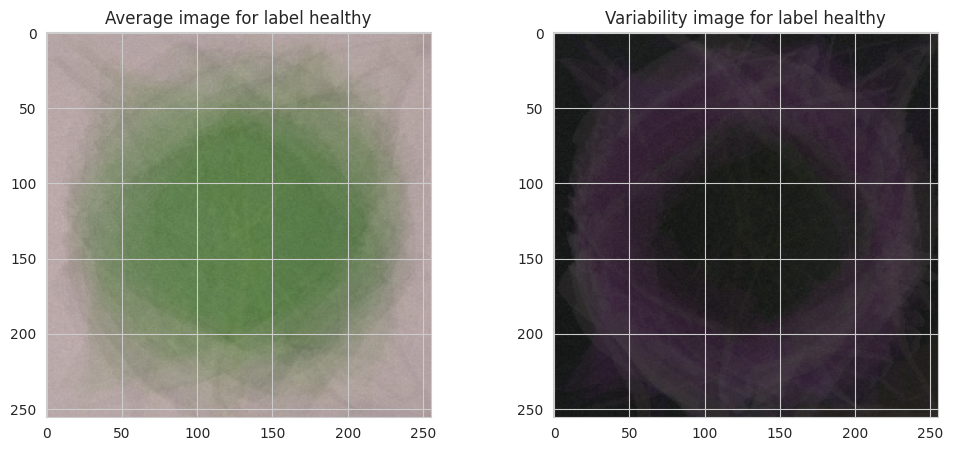

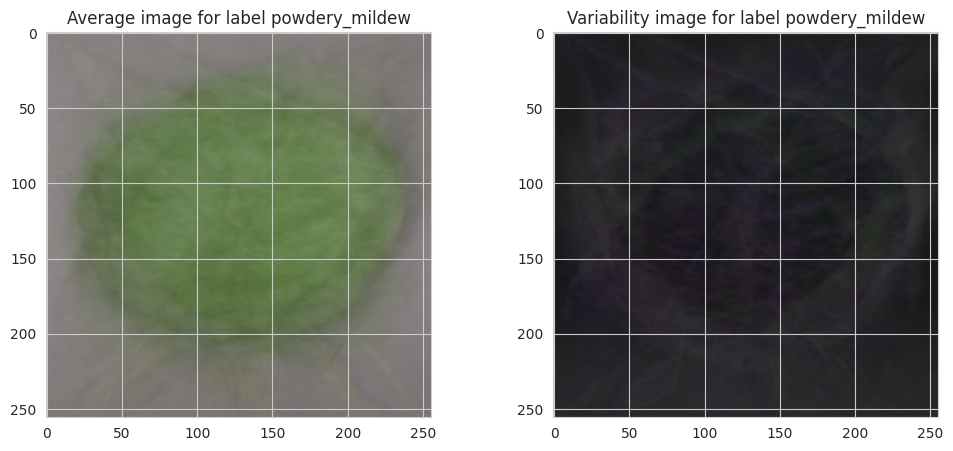

In [18]:
plot_mean_variability_per_label(X=X, y=y, figsize=(12,5),save_image=True)

## Plot differen average images in each class

In [23]:
def subset_image_label(X, y, presented_label):
    y = y.reshape(-1,1,1)
    mask = np.any(y==presented_label, axis=1).reshape(-1)
    df = X[mask]
    return df

def diff_bet_avg_images_array(X, y, label1, label2, figsize=(20,5), save_image=False):

    """
    Checks existence of labels in the set of unique labels
    Calculates the mean and difference between the means between label1 and label2
    Plot the graphs and saves them on the conditions if save_image=True
    """
    
    if any(label not in np.unique(y) for label in [label1, label2]):
        print(f"Either label {label1} or {label2}, are not in {np.unique(y)}")
        return

    images_label = subset_image_label(X, y, label1)
    label1_avg = np.mean(images_label, axis = 0)

    images_label = subset_image_label(X, y, label2) 
    label2_avg = np.mean(images_label, axis = 0)
    
    # or the other way round?
    diff = label1_avg - label2_avg
    
    sns.set_style("white")
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    
    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f"Average {label1}")
    
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f"Average {label2}")
    
    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title(f"Difference image: Average {label2} & {label1}")
    
    if save_image:
        plt.savefig(f"{output_dir}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()
        print('\n')
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


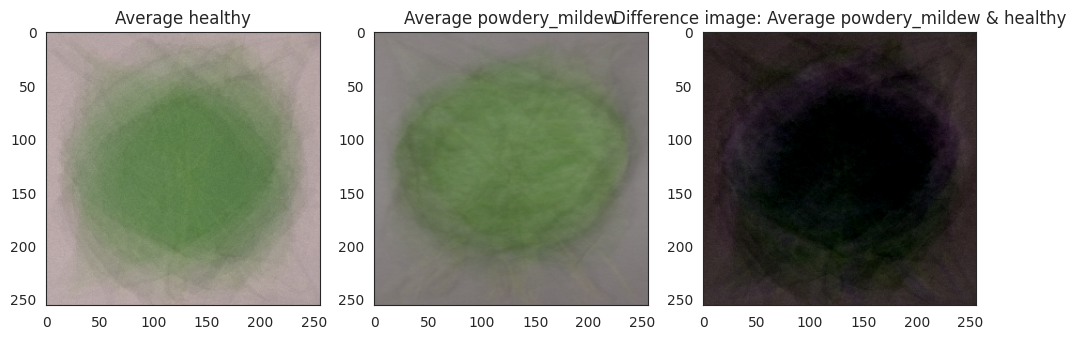

In [24]:
diff_bet_avg_images_array(X=X, y=y, label1='healthy', label2='powdery_mildew',
                          figsize=(12,10), save_image=True)

## Create montage

In [ ]:
import itertools
import random

sns.set_style("darkgrid")

def create_image_montage(dir_path, presented_label, num_rows, num_cols, figsize=(15,10)):
    
    fig_grid = num_rows * num_cols

    if presented_label in labels:
        img_lst = os.listdir(data_dir + '/' + label)
         
        if fig_grid < len(img_lst):
            
            img_idx = np.random.choice(img_lst, num_rows * num_cols)
            
        else:
            print(f'There are {len(img_lst)} in your subset..\n'
                  f'but you requested a montage with {nrows * ncols} spaces. \n'
                  f'Decrease your number of cols or number of rows in your requested montage')
            return
    else:
        print("The label you selected doesn't exist")
        print(f"Label options are: {labels}")
        return
            
    lst_rows = range(0, num_rows)
    lst_cols = range(0, num_cols)
    plot_idx = list(itertools.product(lst_rows,lst_cols))
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    
    for x in range(0, num_rows*num_cols):
        img = imread(dir_path + '/' + presented_label + '/' + img_idx[x])
        img_shape = img.shape
        axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
        axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
        axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
        axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()
    

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
